In [32]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


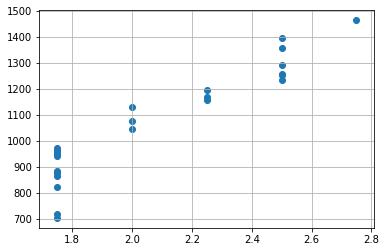

In [34]:
X = df.values[:,2]
Y = df.values[:,4]
plt.scatter(X,Y)
plt.grid()
plt.show()

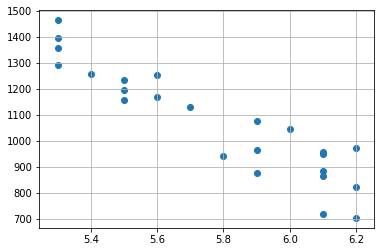

In [35]:
X = df.values[:,3]
Y = df.values[:,4]
plt.scatter(X,Y)
plt.grid()
plt.show()

In [36]:
def simple_linear_regresstion(x_train,y_train):
    SLL = 100
    learing_rate = 0.01
    n = len(x_train)
    cos_his = []
    
    My = np.max(y_train)**2+1
    Mx = np.max(x_train)**2+1 
    
    y = y_train/My
    x = x_train/Mx
    a_0 = 0 
    a_1 = np.array([1,1])
    
    for i in range (SLL):
        y_pred = a_0 + np.dot(a_1,x_train)
        error = y - y_pred
        D_0 = x * (y - y_pred)
        F_0 = y - y_pred
        D_1 = (-2/n) * D_0.sum(axis = 1)
        F_1 = (-2/n) * F_0.sum(axis = 0)
        
        a_0 = a_0 - learing_rate * F_1
        a_1 = a_1 - learing_rate * D_1
        
        cost = (1/n) * sum((y - y_pred)**2)
        cos_his.append(cost)
        print('cost {}; SLL {}'.format(cost,i))
        
    return a_1*My/Mx, a_0*My,cos_his

x_train = np.array(X).T
Y = df.values[:,4]
y_train = np.array(Y)

a_1,a_0,cos_his = simple_linear_regresstion(x_train,y_train)
y_pred = a_0 + np.dot(a_1,x_train)

plt.plot()


ValueError: shapes (2,) and (24,) not aligned: 2 (dim 0) != 24 (dim 0)

In [37]:
 a_1 = np.array([1,1])
np.dot(a_1,x)

NameError: name 'x' is not defined

In [38]:
def simple_linear_regression(x_train, y_train):
    SLL = 100
    learning_rate = 0.01
    cos_his = []
    n = len(x_train)
    
    My = np.max(y_train)**2+1
    Mx = np.max(x_train)**2+1
    
    y = y_train/My
    x = x_train/Mx
    a_0 = 0
    a_1 = np.array([1,1])

    for i in range (SLL):
        
        y_pred = a_0 +  np.dot(a_1,x)
        error = y - y_pred
        D_a_1_1 = x * (y - y_pred) 
        D_a_0_0 = y - y_pred
        D_a_1 = (-2/n) * D_a_1_1.sum(axis=1)  
        D_a_0 = (-2/n) * D_a_0_0.sum(axis = 0) 
        
        a_1 = a_1 - learning_rate * D_a_1  
        a_0 = a_0 - learning_rate * D_a_0  
       
        
        cost = (1/n)*sum((y - y_pred)**2)
        cos_his.append(cost)
        print('cost {}; SLL {}'.format(cost,i))
        
    return a_1*My/Mx, a_0*My,cos_his
    
    
# test 1
#x_train = np.array([1, 2, 3, 4, 5])
#y_train = np.array([5, 7, 9, 11, 13])
# test 2
#x_train = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#y_train = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

x_train = np.array(X).T
Y = df.values[:,4]
y_train = np.array(Y)

a_1, a_0,cos_his = simple_linear_regression(x_train, y_train)
y_pred = a_0 + np.dot(a_1,x_train)

plt.plot(cos_his)


ValueError: shapes (2,) and (24,) not aligned: 2 (dim 0) != 24 (dim 0)